In [2]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i,label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [8]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [9]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [10]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [12]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s - loss: 2.5306 - acc: 0.4962 - val_loss: 1.7180 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 0s - loss: 1.4430 - acc: 0.6878 - val_loss: 1.3435 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 0s - loss: 1.0929 - acc: 0.7661 - val_loss: 1.1704 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 0s - loss: 0.8682 - acc: 0.8166 - val_loss: 1.0788 - val_acc: 0.7600
Epoch 5/20
7982/7982 [==============================] - 0s - loss: 0.7020 - acc: 0.8483 - val_loss: 0.9844 - val_acc: 0.7830
Epoch 6/20
7982/7982 [==============================] - 0s - loss: 0.5666 - acc: 0.8796 - val_loss: 0.9401 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 0s - loss: 0.4592 - acc: 0.9039 - val_loss: 0.9090 - val_acc: 0.8010
Epoch 8/20
7982/7982 [==============================] - 0s - loss: 0.3704 - a

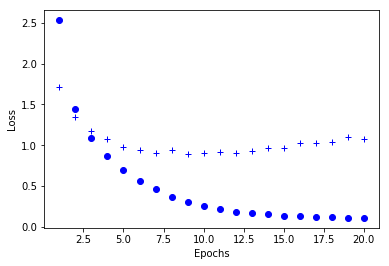

In [13]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo')
plt.plot(epochs, val_loss_values, 'b+')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

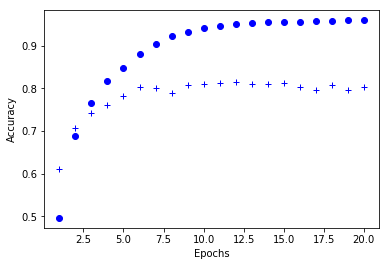

In [14]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [15]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,
          one_hot_train_labels,
          epochs=9,
          batch_size=512,
          validation_data=(x_test, one_hot_test_labels))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 8982 samples, validate on 2246 samples
Epoch 1/9
8982/8982 [==============================] - 1s - loss: 2.4429 - acc: 0.5332 - val_loss: 1.6603 - val_acc: 0.6469
Epoch 2/9
8982/8982 [==============================] - 1s - loss: 1.3238 - acc: 0.7160 - val_loss: 1.3112 - val_acc: 0.7039
Epoch 3/9
8982/8982 [==============================] - 1s - loss: 0.9754 - acc: 0.7866 - val_loss: 1.1430 - val_acc: 0.7511
Epoch 4/9
8982/8982 [==============================] - 1s - loss: 0.7577 - acc: 0.8395 - val_loss: 1.0419 - val_acc: 0.7658
Epoch 5/9
8982/8982 [==============================] - 1s - loss: 0.5967 - acc: 0.8770 - val_loss: 0.9859 - val_acc: 0.7778
Epoch 6/9
8982/8982 [==============================] - 1s - loss: 0.4747 - acc: 0.9007 - val_loss: 0.9759 - val_acc: 0.7881
Epoch 7/9
8982/8982 [==============================] - 1s - loss: 0.3828 - acc: 0.9178 - val_loss: 0.9552 - val_acc: 0.7925
Epoch 8/9
8982/8982 [==============================] - 1s - loss: 0.3074 - acc: 0.93

In [16]:
results

[0.98055442549347982, 0.79162956372182069]

In [17]:
predictions = model.predict(x_test)
predictions[0].shape
np.sum(predictions[0])
np.argmax(predictions[0])

3

In [18]:
np.sum(predictions[0])

1.0

In [19]:
np.argmax(predictions[0])

3

In [21]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [22]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [23]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,
          one_hot_train_labels,
          epochs=10,
          batch_size=128,
          validation_data=(x_test, one_hot_test_labels))

Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 1s - loss: 2.4756 - acc: 0.3833 - val_loss: 1.6635 - val_acc: 0.6420
Epoch 2/10
8982/8982 [==============================] - 1s - loss: 1.3041 - acc: 0.7129 - val_loss: 1.2690 - val_acc: 0.6972
Epoch 3/10
8982/8982 [==============================] - 1s - loss: 0.9835 - acc: 0.7821 - val_loss: 1.1607 - val_acc: 0.7382
Epoch 4/10
8982/8982 [==============================] - 1s - loss: 0.7973 - acc: 0.8213 - val_loss: 1.0967 - val_acc: 0.7435
Epoch 5/10
8982/8982 [==============================] - 1s - loss: 0.6618 - acc: 0.8446 - val_loss: 1.0716 - val_acc: 0.7533
Epoch 6/10
8982/8982 [==============================] - 1s - loss: 0.5579 - acc: 0.8670 - val_loss: 1.0654 - val_acc: 0.7529
Epoch 7/10
8982/8982 [==============================] - 1s - loss: 0.4754 - acc: 0.8834 - val_loss: 1.0808 - val_acc: 0.7596
Epoch 8/10
8982/8982 [==============================] - 1s - loss: 0.4065 - a